### step1. MySQL에서 performance 테이블 불러오기

In [1]:
import pandas as pd
from sqlalchemy import create_engine

# MySQL 연결 정보 설정
user = 'root'
password = '9703'
host = 'localhost'  
port = 3306
database = 'performance_marketing'

# SQLAlchemy 엔진 생성
engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}:{port}/{database}')

# SQL 쿼리 작성 (2023년 10월 ~ 12월)
query = """
SELECT *
FROM performance
WHERE date >= '2023-10-01' AND date <= '2023-12-31';
"""

# 쿼리 실행 및 데이터프레임으로 불러오기
df_q4_2023 = pd.read_sql(query, engine)

In [2]:
# 결과 확인
df_q4_2023

,index,channel,date,week,campaign,ad_group,ad_name,impressions,clicks,spends,conversion_sales,conversions,signup
0,fastcampust_mo_conversion_signuplookalike_riva...,meta,2023-10-01,40,fastcampust_mo_conversion_signup,lookalike_rival,img5_logo,11181.0,648.0,415175.0,1354220.0,5.0,4.0
1,fastcampust_mo_conversion_signuplookalike_inte...,naver,2023-10-01,40,fastcampust_mo_conversion_signup,lookalike_interest,img2_promotion,6395.0,591.0,311622.0,3249630.0,7.0,10.0
2,fastcampust_mo_conversion_signuplookalike_riva...,youtube,2023-10-01,40,fastcampust_mo_conversion_signup,lookalike_rival,img2_promotion,16894.0,871.0,335096.0,3425640.0,7.0,5.0
3,fastcampust_mo_conversion_signupretargeting_in...,google,2023-10-01,40,fastcampust_mo_conversion_signup,retargeting_interest,img5_promotion,18735.0,977.0,316563.0,1866310.0,8.0,8.0
4,fastcampust_mo_conversion_installlookalike_int...,meta,2023-10-01,40,fastcampust_mo_conversion_install,lookalike_interest,img3_promotion,12284.0,992.0,347565.0,3592060.0,12.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12476,fastcampust_mo_conversion_purchaseretargeting_...,google,2023-12-30,52,fastcampust_mo_conversion_purchase,retargeting_rival,img3_logo,14698.0,607.0,50230.0,357359.0,2.0,5.0
12477,fastcampust_mo_conversion_installua_interestim...,meta,2023-12-30,52,fastcampust_mo_conversion_install,ua_interest,img1_logo,9046.0,211.0,46302.5,1351570.0,4.0,2.0
12478,fastcampust_mo_conversion_signupua_interestimg...,google,2023-12-30,52,fastcampust_mo_conversion_signup,ua_interest,img1_promotion,7729.0,554.0,50929.0,388444.0,4.0,8.0
12479,fastcampust_mo_trafficretargeting_interestimg2...,naver,2023-12-30,52,fastcampust_mo_traffic,retargeting_interest,img2_promotion,14111.0,718.0,30452.0,340155.0,3.0,10.0


In [3]:
df_q4_2023['campaign'].value_counts()

campaign
fastcampust_mo_traffic                3209
fastcampust_mo_conversion_purchase    3120
fastcampust_mo_conversion_signup      3110
fastcampust_mo_conversion_install     3042
Name: count, dtype: int64

In [4]:
df_q4_2023['ad_group'].value_counts()

ad_group
lookalike_interest      3104
lookalike_rival         3069
ua_rival                2132
ua_interest             2043
retargeting_rival       1082
retargeting_interest    1051
Name: count, dtype: int64

In [5]:
df_q4_2023['ad_name'].value_counts()

ad_name
img1_promotion    898
img4_tips         876
img5_tips         876
img1_logo         860
img4_logo         836
img2_promotion    831
img2_tips         827
img3_promotion    824
img1_tips         822
img5_logo         822
img5_promotion    822
img3_logo         821
img3_tips         792
img4_promotion    789
img2_logo         785
Name: count, dtype: int64

### step2. 광고 채널별 성과 측정

In [6]:
# 집계할 컬럼 리스트
c_metrics = ['impressions', 'clicks', 'spends', 'conversion_sales', 'conversions', 'signup']

# groupby 후 sum
df_channel_summary = df_q4_2023.groupby('channel')[c_metrics].sum().reset_index()


In [7]:
# 소수점 2자리까지 출력 
pd.set_option('display.float_format', '{:,.2f}'.format)

In [8]:
# 결과 확인
df_channel_summary

,channel,impressions,clicks,spends,conversion_sales,conversions,signup
0,google,"23,888,965.00","1,172,001.00","561,951,452.00","4,839,755,957.00","41,736.00","12,698.00"
1,kakao,"24,109,223.00","1,155,423.00","545,145,507.00","4,797,686,237.00","40,564.00","12,425.00"
2,meta,"23,152,017.00","1,092,638.00","438,815,416.50","5,480,643,257.00","38,740.00","12,091.00"
3,naver,"24,223,434.00","1,171,003.00","369,635,618.40","7,271,220,555.00","40,296.00","12,504.00"
4,naver_search,"23,955,374.00","1,133,645.00","365,693,642.80","7,204,790,578.00","41,065.00","12,490.00"
5,youtube,"24,250,243.00","1,181,823.00","564,788,418.00","4,832,036,021.00","41,605.00","12,539.00"


In [9]:
# 광고 성과 지표를 활용하여 파생컬럼 생성
import numpy as np

# CPC (Cost Per Click)
df_channel_summary["CPC"] = np.where(
    df_channel_summary["clicks"] != 0,
    df_channel_summary["spends"] / df_channel_summary["clicks"],
    0
)

# CTR (Click Through Rate)
df_channel_summary["CTR"] = np.where(
    df_channel_summary["impressions"] != 0,
    (df_channel_summary["clicks"] / df_channel_summary["impressions"]) * 100,
    0
)

# CVR (Conversion Rate)
df_channel_summary["CVR"] = np.where(
    df_channel_summary["clicks"] != 0,
    (df_channel_summary["conversions"] / df_channel_summary["clicks"]) * 100,
    0
)

# ROAS (Return On Ad Spend)
df_channel_summary["ROAS"] = np.where(
    df_channel_summary["spends"] != 0,
    (df_channel_summary["conversion_sales"] / df_channel_summary["spends"]) * 100,
    0
)

In [10]:
df_channel_summary

,channel,impressions,clicks,spends,conversion_sales,conversions,signup,CPC,CTR,CVR,ROAS
0,google,"23,888,965.00","1,172,001.00","561,951,452.00","4,839,755,957.00","41,736.00","12,698.00",479.48,4.91,3.56,861.24
1,kakao,"24,109,223.00","1,155,423.00","545,145,507.00","4,797,686,237.00","40,564.00","12,425.00",471.81,4.79,3.51,880.07
2,meta,"23,152,017.00","1,092,638.00","438,815,416.50","5,480,643,257.00","38,740.00","12,091.00",401.61,4.72,3.55,"1,248.96"
3,naver,"24,223,434.00","1,171,003.00","369,635,618.40","7,271,220,555.00","40,296.00","12,504.00",315.66,4.83,3.44,"1,967.13"
4,naver_search,"23,955,374.00","1,133,645.00","365,693,642.80","7,204,790,578.00","41,065.00","12,490.00",322.58,4.73,3.62,"1,970.17"
5,youtube,"24,250,243.00","1,181,823.00","564,788,418.00","4,832,036,021.00","41,605.00","12,539.00",477.90,4.87,3.52,855.55


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import matplotlib.font_manager as fm

# ✅ 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')  # Windows: 맑은 고딕
elif platform.system() == 'Darwin':  # macOS
    plt.rc('font', family='AppleGothic')
else:  # Linux (예: Google Colab, Ubuntu)
    # 나눔고딕 등 설치된 폰트 경로 지정
    fm_font = fm.FontProperties(fname='/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
    plt.rc('font', family=fm_font.get_name())

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2036\2065936778.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


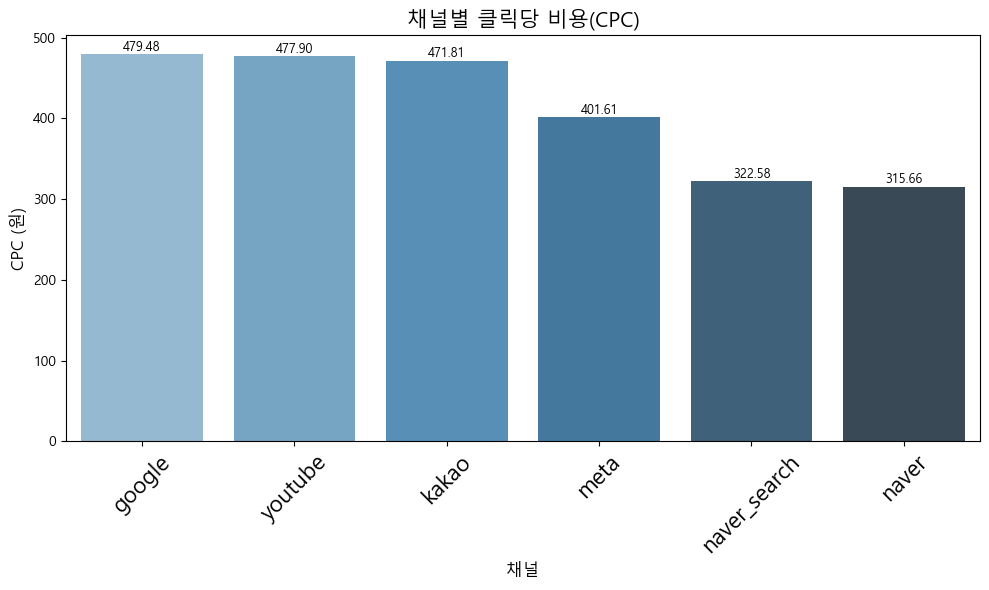

In [12]:
# ✅ 시각화 (CPC + 막대 위 값 표시)
plt.figure(figsize=(10, 6))
sorted_df = df_channel_summary.sort_values('CPC', ascending=False).reset_index(drop=True)

sns.barplot(
    x='channel',
    y='CPC',
    data=sorted_df,
    palette='Blues_d'
)

plt.title('채널별 클릭당 비용(CPC)', fontsize=15)
plt.xlabel('채널', fontsize=12)
plt.ylabel('CPC (원)', fontsize=12)

# ✅ x축 채널 이름의 폰트 크기 키우기
plt.xticks(rotation=45, fontsize=16)  # 폰트 크기 조정

# 막대 위에 값 표시
for index, row in sorted_df.iterrows():
    plt.text(index, row['CPC'] + 0.1, f"{row['CPC']:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2036\3991912258.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


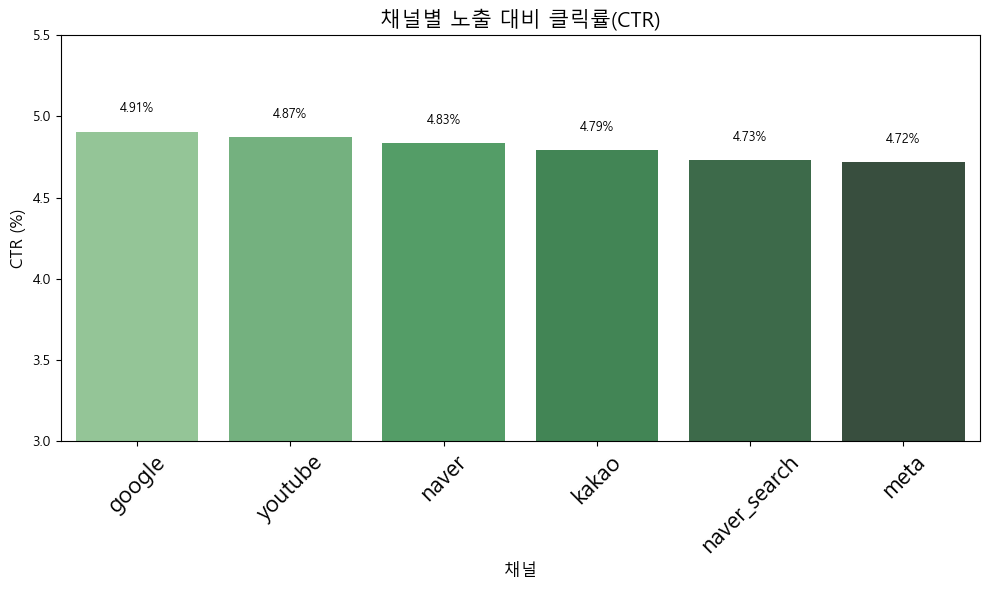

In [13]:
# ✅ 채널별 CTR 시각화 (y축 범위 3~7%)
plt.figure(figsize=(10, 6))
sns.barplot(
    x='channel',
    y='CTR',
    data=df_channel_summary.sort_values('CTR', ascending=False),
    palette='Greens_d'
)

plt.title('채널별 노출 대비 클릭률(CTR)', fontsize=15)
plt.xlabel('채널', fontsize=12)
plt.ylabel('CTR (%)', fontsize=12)
plt.xticks(rotation=45)

# ✅ x축 채널 이름의 폰트 크기 키우기
plt.xticks(rotation=45, fontsize=16)  # 폰트 크기 조정

# y축 범위 설정
plt.ylim(3, 5.5)

# 막대 위에 정확한 값 표시
for index, row in df_channel_summary.sort_values('CTR', ascending=False).reset_index().iterrows():
    plt.text(index, row['CTR'] + 0.1, f"{row['CTR']:.2f}%", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2036\3570207505.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


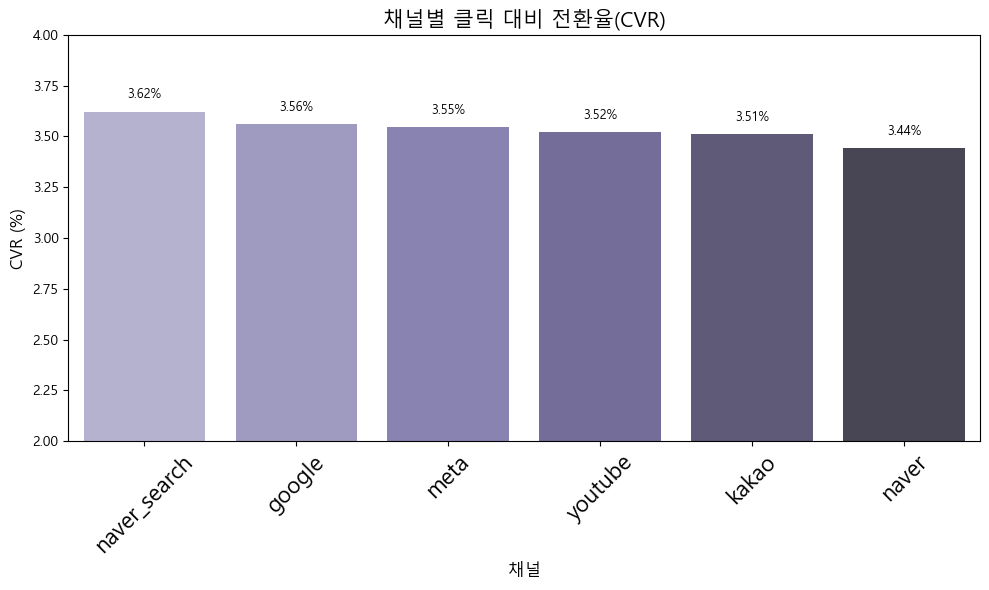

In [14]:
# ✅ 시각화 (CVR + 막대 위 값 표시)
plt.figure(figsize=(10, 6))
sorted_df = df_channel_summary.sort_values('CVR', ascending=False).reset_index(drop=True)

sns.barplot(
    x='channel',
    y='CVR',
    data=sorted_df,
    palette='Purples_d'
)
plt.title('채널별 클릭 대비 전환율(CVR)', fontsize=15)
plt.xlabel('채널', fontsize=12)
plt.ylabel('CVR (%)', fontsize=12)
plt.xticks(rotation=45)

# ✅ x축 채널 이름의 폰트 크기 키우기
plt.xticks(rotation=45, fontsize=16)  # 폰트 크기 조정

# ✅ y축 범위 설정
plt.ylim(2, 4)

# ✅ 막대 위에 값 표시
for index, row in sorted_df.iterrows():
    plt.text(index, row['CVR'] + 0.05, f"{row['CVR']:.2f}%", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

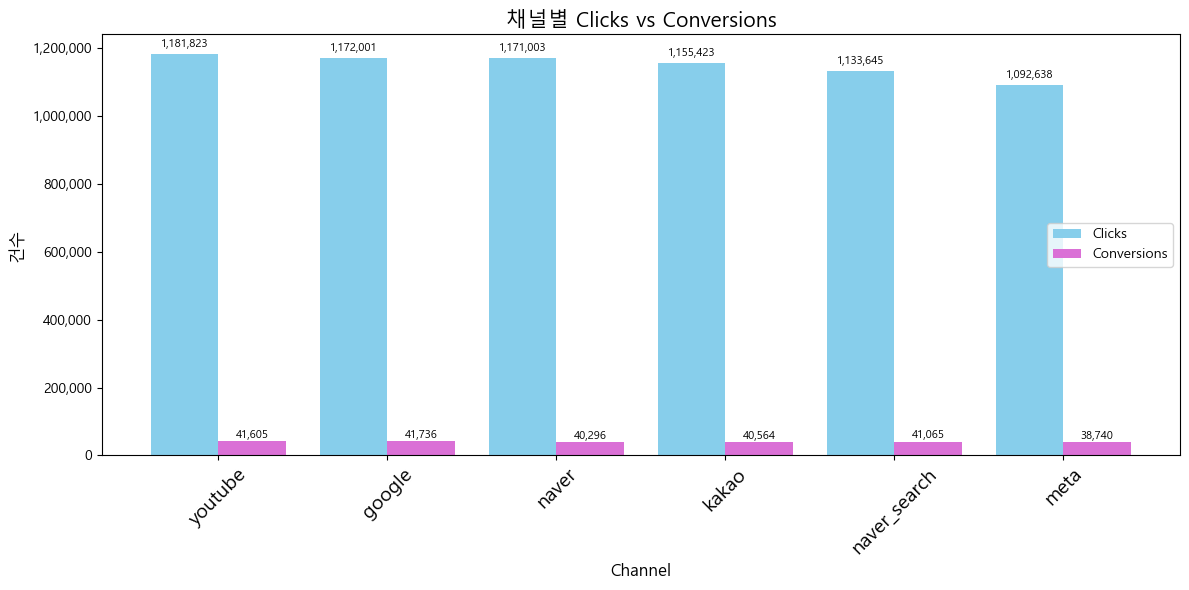

In [15]:
import matplotlib.ticker as ticker

# ✅ clicks 기준 내림차순 정렬
df_sorted = df_channel_summary.sort_values(by='clicks', ascending=False).reset_index(drop=True)

# ✅ 시각화 설정
plt.figure(figsize=(12, 6))
bar_width = 0.4
index = np.arange(len(df_sorted))

# ✅ 막대 그래프 (clicks: 하늘색, conversions: 보라색)
bars1 = plt.bar(index - bar_width/2, df_sorted['clicks'], 
                width=bar_width, color='skyblue', label='Clicks')
bars2 = plt.bar(index + bar_width/2, df_sorted['conversions'], 
                width=bar_width, color='orchid', label='Conversions')

# ✅ 축, 제목, 눈금 설정
plt.xlabel('Channel', fontsize=12)
plt.ylabel('건수', fontsize=12)
plt.title('채널별 Clicks vs Conversions', fontsize=15)
plt.xticks(index, df_sorted['channel'], rotation=45, fontsize=14)
plt.legend()

# ✅ Y축 지수 표기 제거 (천 단위 쉼표)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# ✅ 막대 위 값 표시
for i, (click, conv) in enumerate(zip(df_sorted['clicks'], df_sorted['conversions'])):
    plt.text(i - bar_width/2, click + click * 0.01, f'{int(click):,}', ha='center', va='bottom', fontsize=8)
    plt.text(i + bar_width/2, conv + conv * 0.01, f'{int(conv):,}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2036\1713759849.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


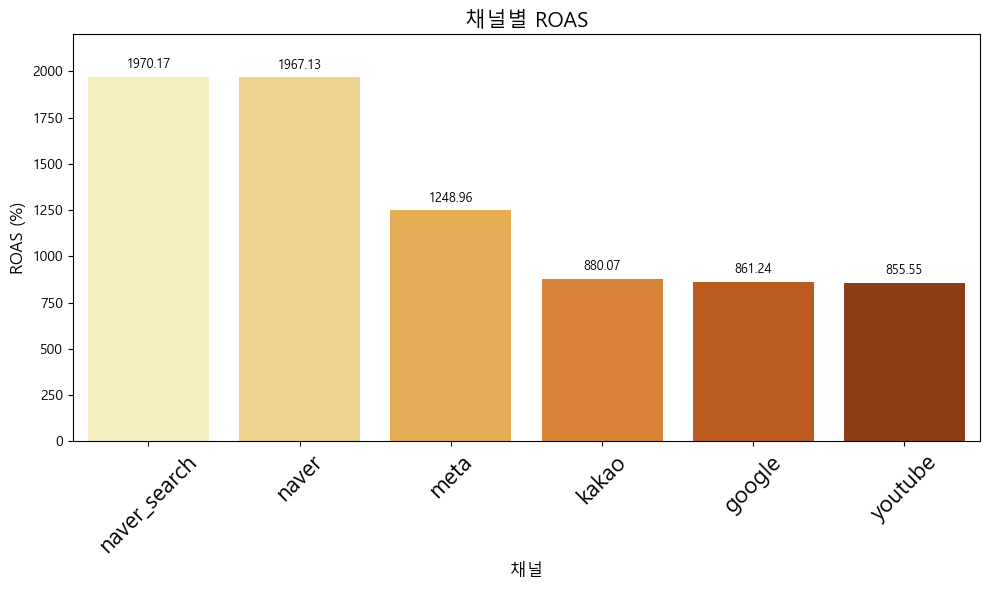

In [16]:
# ✅ 채널별 ROAS 막대그래프
plt.figure(figsize=(10, 6))
sorted_df = df_channel_summary.sort_values('ROAS', ascending=False).reset_index(drop=True)

sns.barplot(
    x='channel',
    y='ROAS',
    data=sorted_df,
    palette='YlOrBr'  # 노란색 계열 팔레트
)
plt.title('채널별 ROAS', fontsize=15)
plt.xlabel('채널', fontsize=12)
plt.ylabel('ROAS (%)', fontsize=12)
plt.xticks(rotation=45)

# ✅ x축 채널 이름의 폰트 크기 키우기
plt.xticks(rotation=45, fontsize=16)  # 폰트 크기 조정

# ✅ y축 범위 설정
plt.ylim(0, 2200)

# ✅ 막대 위에 ROAS 값 표기 (소수 둘째 자리까지)
for index, row in sorted_df.iterrows():
    plt.text(index, row['ROAS'] + 30, f"{row['ROAS']:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

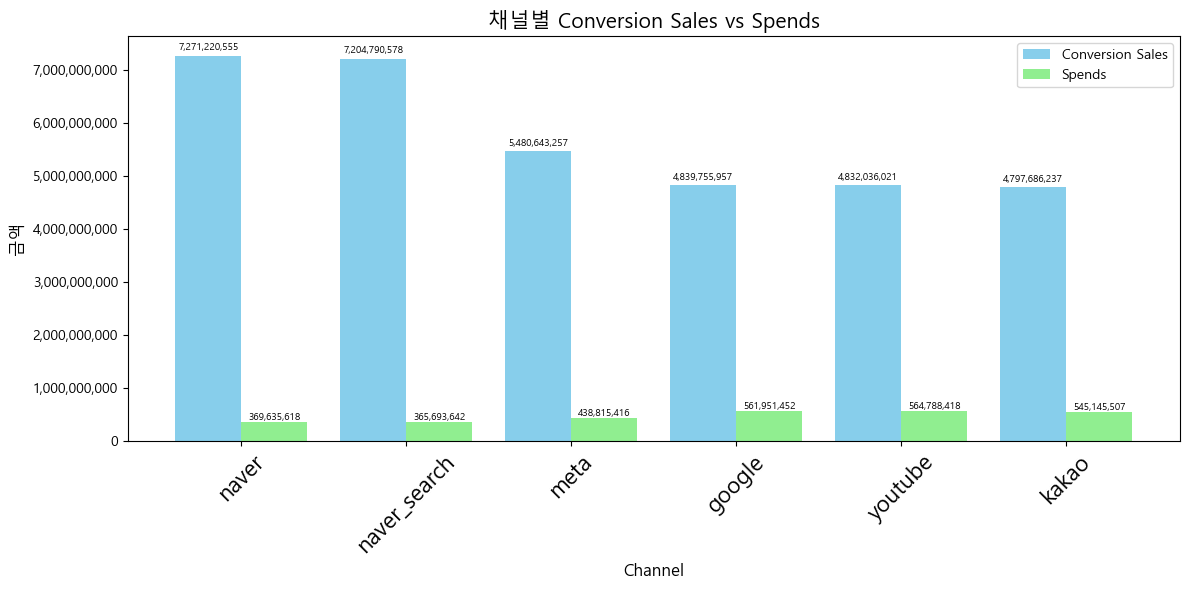

In [17]:
import matplotlib.ticker as ticker

# ✅ conversion_sales 기준 내림차순 정렬
df_sorted = df_channel_summary.sort_values(by='conversion_sales', ascending=False).reset_index(drop=True)

# ✅ 채널별 conversion_sales vs spends 시각화
plt.figure(figsize=(12, 6))
bar_width = 0.4
index = np.arange(len(df_sorted))

# 막대 그래프 (conversion_sales: 파란색, spends: 초록색)
bars1 = plt.bar(index - bar_width/2, df_sorted['conversion_sales'], 
                width=bar_width, color='skyblue', label='Conversion Sales')
bars2 = plt.bar(index + bar_width/2, df_sorted['spends'], 
                width=bar_width, color='lightgreen', label='Spends')

# 축, 제목 설정
plt.xlabel('Channel', fontsize=12)
plt.ylabel('금액', fontsize=12)
plt.title('채널별 Conversion Sales vs Spends', fontsize=15)
plt.xticks(index, df_sorted['channel'], rotation=45)
plt.legend()

# ✅ Y축 지수표현 제거
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# ✅ x축 채널 이름의 폰트 크기 키우기
plt.xticks(rotation=45, fontsize=16)  # 폰트 크기 조정

# ✅ 막대 위 값 표시 (폰트 크기 축소, 위치 조정)
for i, (sales, spend) in enumerate(zip(df_sorted['conversion_sales'], df_sorted['spends'])):
    plt.text(i - bar_width/2, sales + sales * 0.01, f'{int(sales):,}', ha='center', va='bottom', fontsize=7)
    plt.text(i + bar_width/2, spend + spend * 0.01, f'{int(spend):,}', ha='center', va='bottom', fontsize=7)

plt.tight_layout()
plt.show()

- 인사이트 도출 1 : 광고에 투입한 비용 대비 가장 수익률이 좋았던 채널은 naver_search이다. 좀 더 면밀이 보면 광고 비용은 다른 채널보다 낮았고 전환을 통한 구매 금액은 다른 채널보다 높았다.
네이버 검색 광고는 유저가 능동적으로 검색했을 때 노출되기 때문에 구매 목적이 뚜렷한 고객이 많기 때문에 conversion_sales가 높고 naver_search는 클릭 기반이라 spends가 노출기반의 다른 채널보다
낮다.

In [18]:
# ROAS 지표가 비교적 낮은 채널인 youtube, kakao, google을 좀 더 면밀히 분석 
df_youtube_2023 = df_q4_2023[df_q4_2023['channel'] == 'youtube']
df_kakao_2023 = df_q4_2023[df_q4_2023['channel'] == 'kakao']
df_google_2023 = df_q4_2023[df_q4_2023['channel'] == 'google']


In [19]:
# 집계할 컬럼 리스트
c_metrics = ['impressions', 'clicks', 'spends', 'conversion_sales', 'conversions', 'signup']

# groupby 후 sum
df_y_campaign_summary = df_youtube_2023.groupby('campaign')[c_metrics].sum().reset_index()
df_k_campaign_summary = df_kakao_2023.groupby('campaign')[c_metrics].sum().reset_index()
df_g_campaign_summary = df_google_2023.groupby('campaign')[c_metrics].sum().reset_index()

In [20]:
# ROAS (Return On Ad Spend)
df_y_campaign_summary["ROAS"] = np.where(
    df_y_campaign_summary["spends"] != 0,
    (df_y_campaign_summary["conversion_sales"] / df_y_campaign_summary["spends"]) * 100,
    0
)

# ROAS (Return On Ad Spend)
df_k_campaign_summary["ROAS"] = np.where(
    df_k_campaign_summary["spends"] != 0,
    (df_k_campaign_summary["conversion_sales"] / df_k_campaign_summary["spends"]) * 100,
    0
)

# ROAS (Return On Ad Spend)
df_g_campaign_summary["ROAS"] = np.where(
    df_g_campaign_summary["spends"] != 0,
    (df_g_campaign_summary["conversion_sales"] / df_g_campaign_summary["spends"]) * 100,
    0
)

In [21]:
df_y_campaign_summary

,campaign,impressions,clicks,spends,conversion_sales,conversions,signup,ROAS
0,fastcampust_mo_conversion_install,"5,639,757.00","274,173.00","127,343,138.00","1,142,174,098.00","9,601.00","2,871.00",896.93
1,fastcampust_mo_conversion_purchase,"6,190,239.00","289,594.00","140,069,061.00","1,161,921,321.00","10,150.00","3,086.00",829.53
2,fastcampust_mo_conversion_signup,"6,138,893.00","305,207.00","149,031,336.00","1,284,421,337.00","11,076.00","3,301.00",861.85
3,fastcampust_mo_traffic,"6,281,354.00","312,849.00","148,344,883.00","1,243,519,265.00","10,778.00","3,281.00",838.26


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2036\514836788.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


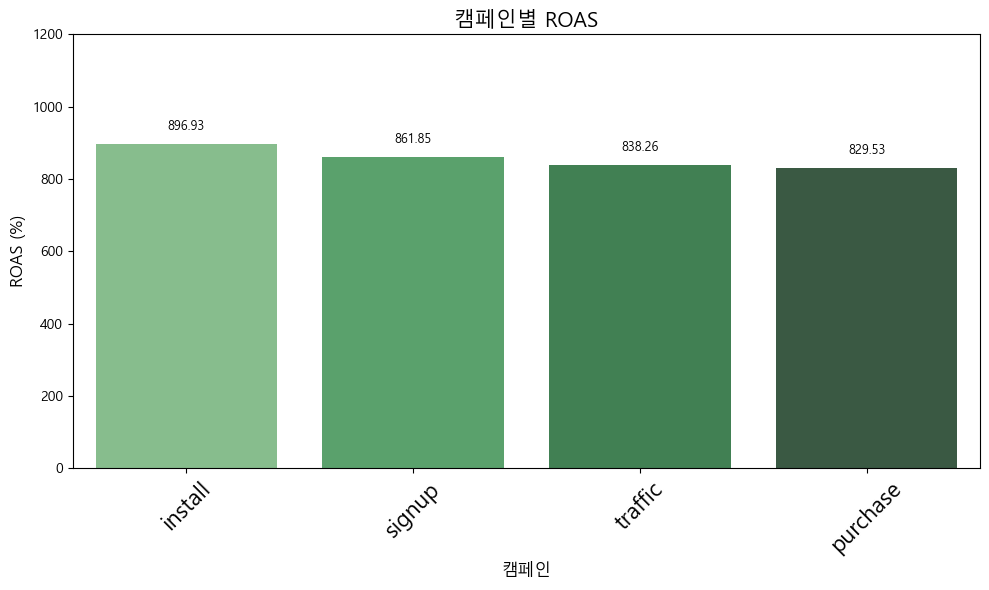

In [22]:
# youtube채널의 광고 캠페인별 ROAS 시각화
# ✅ campaign 컬럼의 마지막 단어만 추출하는 새로운 컬럼 생성
df_y_campaign_summary['campaign_label'] = df_y_campaign_summary['campaign'].str.split('_').str[-1]

# ✅ ROAS 기준 정렬
sorted_y_df = df_y_campaign_summary.sort_values('ROAS', ascending=False).reset_index(drop=True)

# ✅ 캠페인 라벨 정렬에 맞추기
sorted_y_df['campaign_label'] = sorted_y_df['campaign'].str.split('_').str[-1]

# ✅ 시각화
plt.figure(figsize=(10, 6))
sns.barplot(
    x='campaign_label',
    y='ROAS',
    data=sorted_y_df,
    palette='Greens_d'
)
plt.title('캠페인별 ROAS', fontsize=15)
plt.xlabel('캠페인', fontsize=12)
plt.ylabel('ROAS (%)', fontsize=12)
plt.xticks(rotation=0)

# ✅ x축 채널 이름의 폰트 크기 키우기
plt.xticks(rotation=45, fontsize=16)  # 폰트 크기 조정

# ✅ y축 범위 설정
plt.ylim(0, 1200)

# ✅ 막대 위에 ROAS 값 표기
for index, row in sorted_y_df.iterrows():
    plt.text(index, row['ROAS'] + 30, f"{row['ROAS']:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2036\2384867542.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


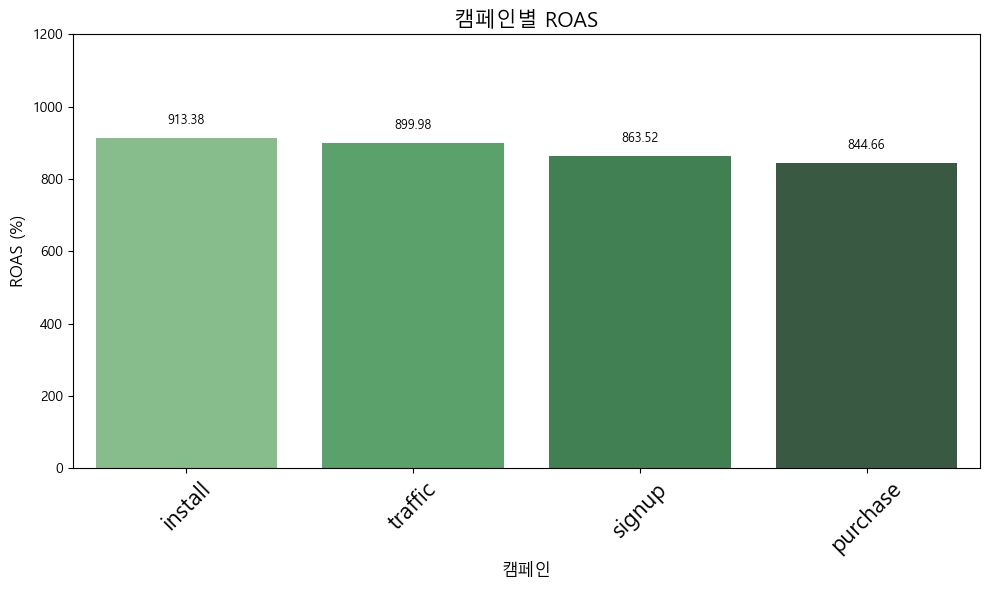

In [23]:
# kakao채널의 광고 캠페인별 ROAS 시각화
# ✅ campaign 컬럼의 마지막 단어만 추출하는 새로운 컬럼 생성
df_k_campaign_summary['campaign_label'] = df_k_campaign_summary['campaign'].str.split('_').str[-1]

# ✅ ROAS 기준 정렬
sorted_k_df = df_k_campaign_summary.sort_values('ROAS', ascending=False).reset_index(drop=True)

# ✅ 캠페인 라벨 정렬에 맞추기
sorted_k_df['campaign_label'] = sorted_k_df['campaign'].str.split('_').str[-1]

# ✅ 시각화
plt.figure(figsize=(10, 6))
sns.barplot(
    x='campaign_label',
    y='ROAS',
    data=sorted_k_df,
    palette='Greens_d'
)
plt.title('캠페인별 ROAS', fontsize=15)
plt.xlabel('캠페인', fontsize=12)
plt.ylabel('ROAS (%)', fontsize=12)
plt.xticks(rotation=0)

# ✅ x축 채널 이름의 폰트 크기 키우기
plt.xticks(rotation=45, fontsize=16)  # 폰트 크기 조정

# ✅ y축 범위 설정
plt.ylim(0, 1200)

# ✅ 막대 위에 ROAS 값 표기
for index, row in sorted_k_df.iterrows():
    plt.text(index, row['ROAS'] + 30, f"{row['ROAS']:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_2036\617499972.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


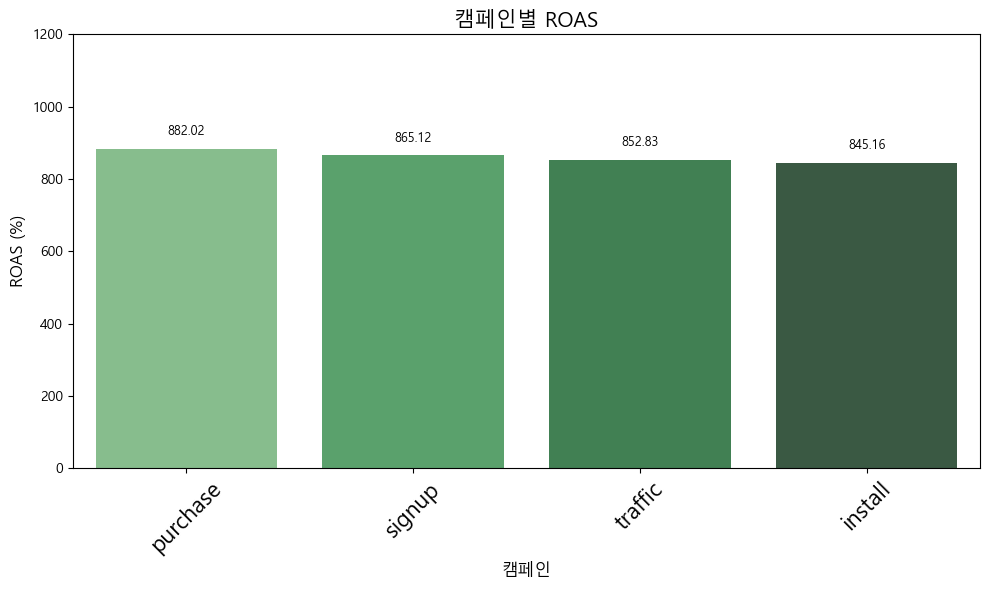

In [24]:
# google채널의 광고 캠페인별 ROAS 시각화
# ✅ campaign 컬럼의 마지막 단어만 추출하는 새로운 컬럼 생성
df_g_campaign_summary['campaign_label'] = df_g_campaign_summary['campaign'].str.split('_').str[-1]

# ✅ ROAS 기준 정렬
sorted_g_df = df_g_campaign_summary.sort_values('ROAS', ascending=False).reset_index(drop=True)

# ✅ 캠페인 라벨 정렬에 맞추기
sorted_g_df['campaign_label'] = sorted_g_df['campaign'].str.split('_').str[-1]

# ✅ 시각화
plt.figure(figsize=(10, 6))
sns.barplot(
    x='campaign_label',
    y='ROAS',
    data=sorted_g_df,
    palette='Greens_d'
)
plt.title('캠페인별 ROAS', fontsize=15)
plt.xlabel('캠페인', fontsize=12)
plt.ylabel('ROAS (%)', fontsize=12)
plt.xticks(rotation=0)

# ✅ x축 채널 이름의 폰트 크기 키우기
plt.xticks(rotation=45, fontsize=16)  # 폰트 크기 조정

# ✅ y축 범위 설정
plt.ylim(0, 1200)

# ✅ 막대 위에 ROAS 값 표기
for index, row in sorted_g_df.iterrows():
    plt.text(index, row['ROAS'] + 30, f"{row['ROAS']:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()